# ML Regression Algorithms from Scratch - Polynomial Regression 

## Introduction

In this notebook, first, we implement Polynomial Regression from Scratch using Numpy without Sklearn. After the scratch implementation, we also implement the Polynomial Regression using Sklearn and compare the two models. The complete code is written and executed in Google Colab. No need of installing any additional packages is required. Download this notebook and upload to Google Colab to run it by yourself. Don't forget to grab your Datasets! 

The Dataset used here is the **Position_Salaries** dataset provided by the Super Data Science Team under their programme **Machine Learning A-Z: Hands on Python & R in Data Science**. Find the various datasets provided by them [here](https://www.superdatascience.com/pages/machine-learning).

**Response Variable** : Position

**Target Variable** : Salary

**Equation Used** : $y = W0 * X0 + W1 * X1 + W2 * X1^{2} + .... + WN * X1^{N}$

**Why Linear?**

A genuine question can be "If the equation contain powers greater than one, how come it is **linear** regression?" It's a great question! Note that the powers of $X$ are greater than one and these are actually constants. We have these values in our dataset. We care more about $W$ and the equation combines these product of $W$ and $X$ linearly i.e it has the linear combination of these terms.


**For Scratch Implementation:**
    
    Loss Function : Squared Error

    Optimization Algorithm : SGD

    Weight Initialization : Xavier Initialization



## Polynomial Regression from Scratch without SKlearn

### Importing the Dependencies

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!cp /content/drive/MyDrive/Position_Salaries.csv /content

### Get the Data and Data Preprocessing

In [3]:
#Get the dataset
dataset = pd.read_csv(r'/content/Position_Salaries.csv')

In [4]:
#Get a glimpse of the Dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
#Separating the independent and dependent features
#Dependent feature
y = np.asarray(dataset['Salary'].values.tolist()) 

# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [6]:
# Reshaping the independent feature
X = X.reshape(-1,1)

In [7]:
#Reshaping the Dependent features
y = y.reshape(len(y),1) # Changing the shape from (50,) to (50,1)

In [8]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (10, 1)
The shape of the dependent fatures are  (10, 1)


### Utility Methods

In [9]:
# The method "poly_features" concatenates polynomials of independent feature to X
# This is similar to PolynomialFeatures class from sklearn.preprocessing
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

In [10]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [11]:
# The method pred_to_plot returns predictions on given values and helps in
# better visualization
def pred_to_plot(W_trained, X):
  prediction_values = list()
  for i in range(X.shape[0]):
    value = regressor.predict(W_trained,X[i])
    prediction_values.append(value)
  return prediction_values

### Coding the polynomialRegression Class

In [12]:
class polynomialRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  


### Polynomial Regression (N = 2)

Consider the Polynomial Regression equation, we need to decide the value of $N$ with respect to the Data. Here, we choose the value $N=2$. Definitely, we can iterate over various values of $N$, after the initial results. However, first, we need to create another column $Level^{2}$, since it's our Independent Feature.

In [13]:
# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [14]:
# Reshaping the independent feature
X = X.reshape(-1,1)

In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [16]:
X = poly_features(2,X)

In [17]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))
X = np.concatenate((X,np.ones((10,1))), axis = 1)

In [18]:
X

array([[  1.,   1.,   1.],
       [  2.,   4.,   1.],
       [  3.,   9.,   1.],
       [  4.,  16.,   1.],
       [  5.,  25.,   1.],
       [  6.,  36.,   1.],
       [  7.,  49.,   1.],
       [  8.,  64.,   1.],
       [  9.,  81.,   1.],
       [ 10., 100.,   1.]])

In [19]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [20]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [21]:
#declaring the "regressor" as an object of the class polynomialRegression
regressor = polynomialRegression()

In [22]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.00001)

In [23]:
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

#### Visualizing Results

We use the entire dataset for better visualization because only test dataset won't give a clear idea because the size of our dataset is too small. Using the complete dataset will enable us to get a better insight.


 We use the entire dataset for all the visualizations ahead in the notebook too.

In [24]:
pred_plot = pred_to_plot(W_trained,X)

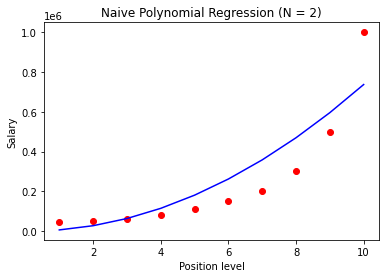

In [25]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

We have got good results for $N=2$ but we can try for better performance by changing the value of $N$.

 Let us train the regressor for $N=4$.

### Polynomial Regression (N=4)

In [26]:
# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [27]:
# Reshaping the independent feature
X = X.reshape(-1,1)

In [28]:
# Constructing the polynomials of our Independent features 
X_poly = poly_features(4,X)

In [29]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))
X_poly = np.concatenate((X_poly,np.ones((10,1))), axis = 1)

In [30]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 1.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 1.000e+00],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.000e+00],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 1.000e+00],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03, 1.000e+00],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03, 1.000e+00],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03, 1.000e+00],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03, 1.000e+00],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04, 1.000e+00]])

In [31]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [32]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X_poly,y)

In [33]:
#declaring the "regressor" as an object of the class LinearRegression
regressor = polynomialRegression()

In [34]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=1000, alpha=1e-9)

In [35]:
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

In [36]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 1.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 1.000e+00],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.000e+00],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 1.000e+00],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03, 1.000e+00],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03, 1.000e+00],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03, 1.000e+00],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03, 1.000e+00],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04, 1.000e+00]])

#### Visualizing Results

In [37]:
pred_plot = pred_to_plot(W_trained,X_poly)

In [38]:
pred_plot

[101.56686988148302,
 1570.332736753576,
 7876.252690310476,
 24783.645533405484,
 60351.39230382515,
 124932.93627428928,
 231176.28295245094,
 394024.0000808964,
 630713.2176371454,
 960775.6278336504]

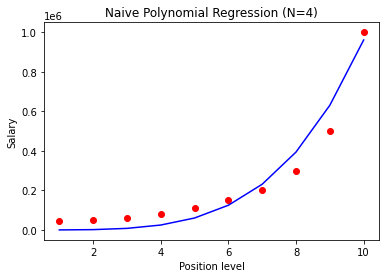

In [39]:
plt.scatter(X_poly[:,0], y, color = 'red')
plt.plot(X_poly[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N=4)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Clearly, the regressor with $N=4$ performs better than the regressor with $N=2$. You can increase the value of $N$ and look for better performance but, be careful that you don't run into the problem of **Overfitting**.

As of now, our best regressor has $N=4$ and therefore, we will train the polynomial regression using sklearn only for $N=4$

## Polynomial Regression using Sklearn

### Importing dependencies

In [40]:
import numpy as np
import pandas
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Data Preprocessing

In [41]:
#Get the Dataset and separating the independent and dependent features
dataset = pd.read_csv(r'/content/drive/MyDrive/Position_Salaries.csv')
X_sk = dataset.iloc[:, 1].values
y_sk = dataset.iloc[:, -1].values

In [42]:
#Reshaping the Independent amd Dependent Features
X_sk = X_sk.reshape(-1,1)
y_sk = y_sk.reshape(-1,1)

In [43]:
# Constructing the polynomials of our Independent features 
poly_reg = PolynomialFeatures(degree = 4)
X_poly_sk = poly_reg.fit_transform(X_sk)

In [44]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X_poly_sk.shape)
print("The shape of the dependent fatures are ",y_sk.shape)

The shape of the independent fatures are  (10, 5)
The shape of the dependent fatures are  (10, 1)


In [45]:
X_poly_sk

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### Polynomial Regression

In [46]:
# Splitting the dataset into the Training set and Test set
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_poly_sk, y_sk, test_size = 0.2, random_state = 0)

In [47]:
# Fitting Simple Linear Regression to the Training set
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk, y_train_sk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visualizing the results

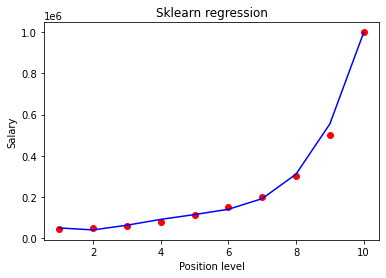

In [48]:
plt.scatter(X_poly_sk[:,1], y, color = 'red')
plt.plot(X_poly_sk[:,1], regressor_sk.predict(X_poly_sk), color = 'blue')
plt.title('Sklearn regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Definitely, you can download this notebook and change hyperparameters, Optimization Algorithm, etc. to improve the performance of the model and start your ML Journey!

**Best of Luck!**

